# 母婴商品整体分析

## 项目介绍

### 项目背景
Ali_Mum_Baby是一个包含超过900万儿童信息(生日和性别)的数据集，由消费者提供，他们共享这些信息是为了获得更好的推荐或搜索结果。

此项目分析其中的交易数据表，以了解母婴市场的特点

数据来源:https://tianchi.aliyun.com/dataset/dataDetail?dataId=45

### 分析目的

1，分析电商渠道母婴产品的市场分布情况

2，针对不同的时间节点和场景做出不同的销售和运营管理策略

In [1]:
# 数据处理包
import numpy as np
import pandas as pd

# 数据可视化包
import matplotlib.pyplot as plt
import seaborn as sns

# Echarts图表包
import pyecharts.charts as pyc
import pyecharts.options as opts

# 提示错误或过时用法包
import warnings

# 日期和时间包
from datetime import datetime

In [2]:
# 错误忽略
warnings.filterwarnings("ignore")

# 图片在线显示
%matplotlib inline

#pylot使用rc配置文件来自定义图形的各种默认属性，称之为rc配置或rc参数
#通过rc参数可以修改默认的属性，包括窗体大小、每英寸的点数、线条宽度、颜色、样式、坐标轴、坐标和网络属性、文本、字体等。
#rc参数存储在字典变量中，通过字典的方式进行访问

##设置rc参数显示中文标题，设置字体为微软雅黑显示中文
#plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['font.sans-serif'] = ['SimHei']

#设置正常显示字符-负号
plt.rcParams['axes.unicode_minus'] = False

# 作图的字体默认设置
fontdict = {'fontsize': 15,
            'horizontalalignment': 'center'}

## 数据准备

### 导入数据

In [4]:
#读取sam_tianchi_mum_baby_trade_history.csv文件
trade = pd.read_csv('./sam_tianchi_mum_baby_trade_history.csv')

### 初探数据

In [6]:
# 读取trade的整体数据情况，包括列数，名称，类型，每列的数据量等
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29971 entries, 0 to 29970
Data columns (total 7 columns):
user_id       29971 non-null int64
auction_id    29971 non-null int64
cat_id        29971 non-null int64
cat1          29971 non-null int64
property      29827 non-null object
buy_mount     29971 non-null int64
day           29971 non-null int64
dtypes: int64(6), object(1)
memory usage: 1.6+ MB


In [8]:
trade.head()

,user_id,auction_id,cat_id,cat1,property,buy_mount,day
0,786295544,41098319944,50014866,50022520,21458:86755362;13023209:3593274;10984217:21985...,2,20140919
1,532110457,17916191097,50011993,28,21458:11399317;1628862:3251296;21475:137325;16...,1,20131011
2,249013725,21896936223,50012461,50014815,21458:30992;1628665:92012;1628665:3233938;1628...,1,20131011
3,917056007,12515996043,50018831,50014815,21458:15841995;21956:3494076;27000458:59723383...,2,20141023
4,444069173,20487688075,50013636,50008168,21458:30992;13658074:3323064;1628665:3233941;1...,1,20141103


In [9]:
# buy_count描述性统计分析
trade.buy_mount.describe()

count    29971.000000
mean         2.544126
std         63.986879
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      10000.000000
Name: buy_mount, dtype: float64

In [10]:
#对buy_count的每个值进行计数并且排序
#默认降序排列，如果要升序排列可以添加参数ascending = True
#统计每个值的占比，normalize=True
trade.buy_mount.value_counts(normalize=True)
#trade.buy_mount.value_counts()

1        0.878683
2        0.060025
3        0.013580
4        0.009476
5        0.008809
6        0.006606
10       0.006506
8        0.002069
12       0.001935
20       0.001835
15       0.001001
7        0.000968
30       0.000801
100      0.000767
50       0.000601
9        0.000534
11       0.000500
13       0.000334
40       0.000300
14       0.000300
200      0.000300
60       0.000300
16       0.000267
18       0.000234
24       0.000234
25       0.000200
26       0.000167
70       0.000133
36       0.000133
80       0.000133
           ...   
350      0.000033
400      0.000033
192      0.000033
498      0.000033
160      0.000033
95       0.000033
64       0.000033
48       0.000033
176      0.000033
700      0.000033
29       0.000033
195      0.000033
151      0.000033
1000     0.000033
150      0.000033
159      0.000033
410      0.000033
101      0.000033
21       0.000033
27       0.000033
10000    0.000033
500      0.000033
340      0.000033
276      0.000033
148      0

In [11]:
#按照索引进行排序
quantity = trade.buy_mount.value_counts().sort_index(ascending=True)

In [12]:
quantity.describe()

count       81.000000
mean       370.012346
std       2928.495576
min          1.000000
25%          1.000000
50%          2.000000
75%          9.000000
max      26335.000000
Name: buy_mount, dtype: float64

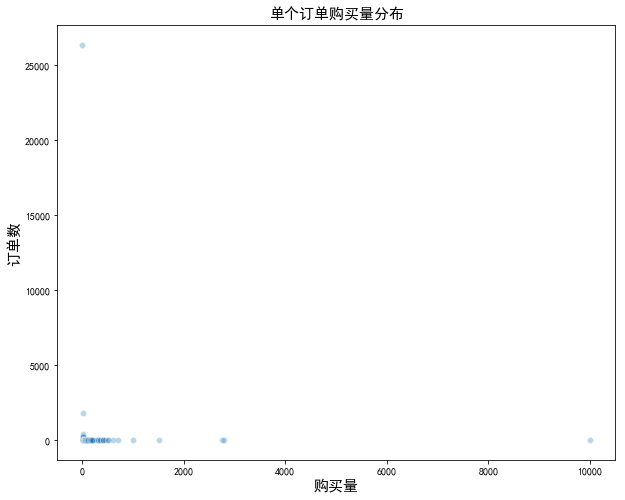

In [13]:
#整体显示数据的分布，为下一步数据清洗做准备
# 设定画布大小
plt.figure(figsize=(10, 8))
#设定x和y的值
sns.scatterplot(x=quantity.index, y=quantity.values, alpha=0.3)
#设定图标题
plt.title("单个订单购买量分布", fontdict=fontdict)
#设定x和y的标题
plt.ylabel("订单数", fontdict=fontdict)
plt.xlabel("购买量", fontdict=fontdict)
#显示图片
plt.show()

### 数据清洗

In [14]:
# 保留buy_mount[0,195]以内的记录
trade = trade[(trade.buy_mount >= 1) & (trade.buy_mount <= 195)]

In [15]:
#查看处理后的数据描述性统计分布
trade.describe()

,user_id,auction_id,cat_id,cat1,buy_mount,day
count,2.994200e+04,2.994200e+04,2.994200e+04,2.994200e+04,29942.000000,2.994200e+04
mean,6.763726e+08,2.565887e+10,5.295068e+07,4.152757e+07,1.668993,2.013562e+07
std,6.330372e+08,1.145217e+10,2.056374e+07,3.130769e+07,5.265581,7.606554e+03
min,2.356000e+03,2.763449e+07,1.662000e+03,2.800000e+01,1.000000,2.012070e+07
25%,1.248970e+08,1.659131e+10,5.001055e+07,3.800000e+01,1.000000,2.013062e+07
50%,5.459420e+08,2.153402e+10,5.001245e+07,5.000817e+07,1.000000,2.014030e+07
75%,9.054797e+08,3.778799e+10,5.001603e+07,5.001482e+07,1.000000,2.014091e+07
max,2.431253e+09,4.368693e+10,1.226960e+08,1.226500e+08,195.000000,2.015020e+07


In [16]:
# auction_id列重命名
trade.rename({"auction_id": "item_id"}, axis=1, inplace=True)

In [17]:
#查看处理后的列名
trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29942 entries, 0 to 29970
Data columns (total 7 columns):
user_id      29942 non-null int64
item_id      29942 non-null int64
cat_id       29942 non-null int64
cat1         29942 non-null int64
property     29800 non-null object
buy_mount    29942 non-null int64
day          29942 non-null int64
dtypes: int64(6), object(1)
memory usage: 1.8+ MB


In [18]:
# 将property暂且取出放在一边，后续再分析
property = trade.property
#更新删除property列后的数据集
trade.drop('property', axis=1, inplace=True)

In [19]:
#查看property
property.head()

0    21458:86755362;13023209:3593274;10984217:21985...
1    21458:11399317;1628862:3251296;21475:137325;16...
2    21458:30992;1628665:92012;1628665:3233938;1628...
3    21458:15841995;21956:3494076;27000458:59723383...
4    21458:30992;13658074:3323064;1628665:3233941;1...
Name: property, dtype: object

In [20]:
#查看删除property列后的数据集
trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29942 entries, 0 to 29970
Data columns (total 6 columns):
user_id      29942 non-null int64
item_id      29942 non-null int64
cat_id       29942 non-null int64
cat1         29942 non-null int64
buy_mount    29942 non-null int64
day          29942 non-null int64
dtypes: int64(6)
memory usage: 1.6 MB


In [21]:
# baby和trade数据集中对日期类型进行转换
baby['birthday'] = pd.to_datetime(baby.birthday.astype('str'))
trade['day'] = pd.to_datetime(trade.day.astype('str'))

In [22]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29942 entries, 0 to 29970
Data columns (total 6 columns):
user_id      29942 non-null int64
item_id      29942 non-null int64
cat_id       29942 non-null int64
cat1         29942 non-null int64
buy_mount    29942 non-null int64
day          29942 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.6 MB


In [23]:
#查看统计的时间范围
#结果显示：本次统计数据的时间范围是2012/7/2-2015/2/5
trade.day.describe()

count                   29942
unique                    949
top       2014-11-11 00:00:00
freq                      454
first     2012-07-02 00:00:00
last      2015-02-05 00:00:00
Name: day, dtype: object

In [24]:
trade['cat1'].value_counts()

50008168     12490
28            6941
50014815      4832
50022520      2366
122650008     2110
38            1203
Name: cat1, dtype: int64

In [25]:
#Pandas nunique() 用于获取唯一值的统计次数
count_cat1 = trade.cat1.nunique()
count_cat = trade.cat_id.nunique()
count_item = trade.item_id.nunique()
sales_volume = trade.buy_mount.sum()
count_user = trade.user_id.nunique()

print("商品类目数：", count_cat1)
print("商品类别数：", count_cat)
print("商品数：", count_item)
print("总销量：", sales_volume)
print("用户数", count_user)

商品类目数： 6
商品类别数： 662
商品数： 28394
总销量： 49973
用户数 29915


## 数据分析

### 整体市场情况

In [26]:
# 根据年月查看销量趋势
# 根据年分组,Series类型的数据，经过to_datetime 之后就可以用 pandas.Series.dt.day, pandas.Series.dt.month,pandas.Series.dt.year提取,
year_item = trade[['item_id', 'buy_mount', 'day']].groupby(by=trade.day.dt.year)['buy_mount'].sum()

In [27]:
year_item

day
2012     6423
2013    16371
2014    24406
2015     2773
Name: buy_mount, dtype: int64

In [28]:
# 根据季度分组
year_quarter_item = trade[['item_id', 'buy_mount', 'day']].groupby(by=[trade.day.dt.year, trade.day.dt.quarter])['buy_mount'].sum()
#year_quarter_item = trade[['item_id', 'buy_mount', 'day']].groupby(by=[trade.day.dt.year, trade.day.dt.month,trade.day.dt.day])['buy_mount'].sum()

In [29]:
year_quarter_item

day   day
2012  3      2777
      4      3646
2013  1      2767
      2      4102
      3      4326
      4      5176
2014  1      4476
      2      6518
      3      5738
      4      7674
2015  1      2773
Name: buy_mount, dtype: int64

In [30]:
# 根据年月分组
year_month_item = trade[['item_id', 'buy_mount', 'day']].groupby(by=[trade.day.dt.year, trade.day.dt.month])['buy_mount'].sum()

In [31]:
year_month_item

day   day
2012  7       643
      8       781
      9      1353
      10     1072
      11     1583
      12      991
2013  1      1096
      2       577
      3      1094
      4      1206
      5      1664
      6      1232
      7      1356
      8      1364
      9      1606
      10     1390
      11     2128
      12     1658
2014  1      1109
      2      1458
      3      1909
      4      2204
      5      2729
      6      1585
      7      1661
      8      1940
      9      2137
      10     2122
      11     3044
      12     2508
2015  1      2252
      2       521
Name: buy_mount, dtype: int64

#### 年度销量趋势

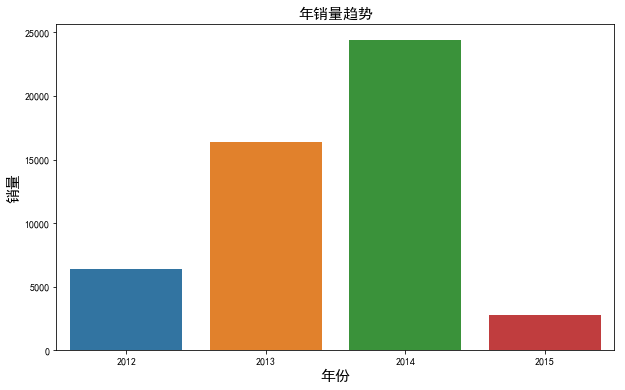

In [32]:
# 各年销量情况
plt.figure(figsize=(10, 6))

sns.barplot(x=year_item.index, y=year_item.values)

plt.title("年销量趋势", fontdict=fontdict)
plt.xlabel("年份", fontdict=fontdict)
plt.ylabel("销量", fontdict=fontdict)

plt.show()

#### 季度销量趋势

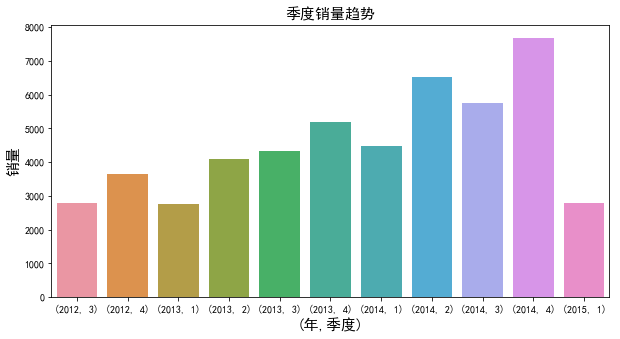

In [33]:
# 各季度销售情况
plt.figure(figsize=(10, 5))

sns.barplot(x=year_quarter_item.index, y=year_quarter_item.values)

plt.title("季度销量趋势", fontdict=fontdict)
plt.xlabel("(年,季度)", fontdict=fontdict)
plt.ylabel("销量", fontdict=fontdict)

plt.show()

#### 月度销量趋势

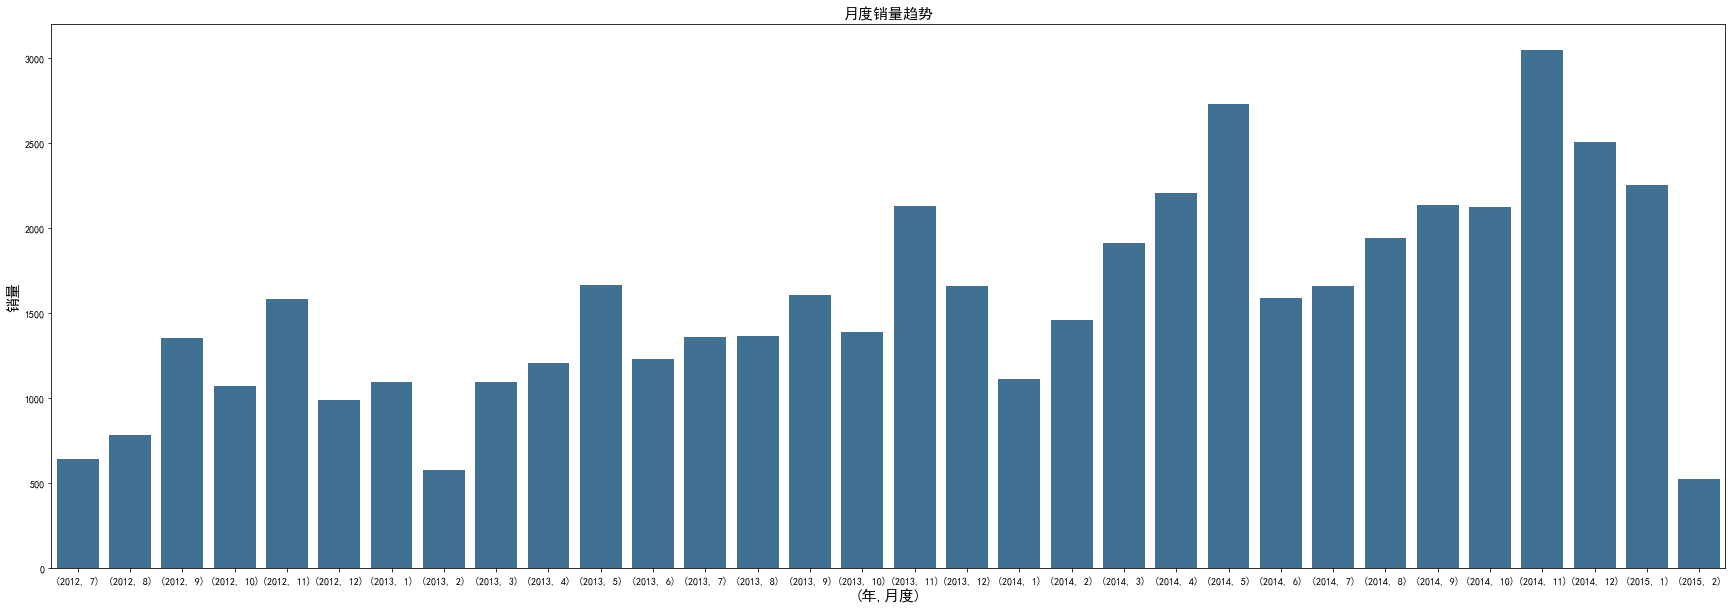

In [34]:
# 各月销售情况
plt.figure(figsize=(30, 10))

sns.barplot(x=year_month_item.index, y=year_month_item.values,color='#3274a1')

plt.title("月度销量趋势", fontdict=fontdict)
plt.xlabel("(年,月度)", fontdict=fontdict)
plt.ylabel("销量", fontdict=fontdict)

plt.show()

In [35]:
# 各月份销量情况
x = [str(x[0])+"/"+str(x[1]) for x in year_month_item.index]
y = [int(x) for x in year_month_item.values]
# 采用Echarts图表格式，方便交互
pyc.Bar().add_xaxis(xaxis_data=x).add_yaxis(series_name="母婴商品销量", yaxis_data=y, markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(coord=[x[4], y[4]], value=y[4]), opts.MarkPointItem(coord=[x[10], y[10]], value=y[10]), opts.MarkPointItem(coord=[x[16], y[16]], value=y[16]), opts.MarkPointItem(coord=[x[22], y[22]], value=y[22]), opts.MarkPointItem(coord=[x[28], y[28]], value=y[28])])
                                           ).set_series_opts(label_opts=opts.LabelOpts(is_show=False)
                                                            ).set_global_opts(title_opts=opts.TitleOpts(title="月销量趋势", subtitle="2012/7-2015/2的销量趋势图"), toolbox_opts=opts.ToolboxOpts()).render_notebook()

#### 销量异常分析

#### 第一季度销量下滑原因
假设一下销售量下降是否和春节假期有关?

In [36]:
def quarterData(trade: pd.DataFrame, low: tuple, high: tuple) -> list:
    """
    输入日期型字符串,返回日期范围内的销量和用户量
    """
    from datetime import datetime
    low = datetime.strptime(low, "%Y/%m/%d")
    high = datetime.strptime(high, "%Y/%m/%d")
    trade_low = trade[(trade.day >= datetime(low.year, low.month, low.day)) & (
        trade.day <= datetime(high.year, high.month, high.day))]
    group_low = trade_low[['buy_mount', 'day', 'user_id']].groupby(
        by=[trade_low.day.dt.month, trade_low.day.dt.day])
    mount = group_low.buy_mount.sum()
    user = group_low.user_id.nunique()

    return [mount, user]

In [37]:
def lineMountUser(mount, user, title):
    """
    输入销量和用户量数据以及标题，生成折线图
    """
    plot = pyc.Line().add_xaxis(xaxis_data=[str(x[0])+"/"+str(x[1]) for x in mount.index]
                                ).add_yaxis(series_name="销量", y_axis=[int(x) for x in mount.values], markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(name='当月销量均值', type_="average")])
                                            ).add_yaxis(series_name="用户量", y_axis=[int(x) for x in user.values], markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(name='当月用户量量均值', type_="average")])
                                                        ).set_series_opts(label_opts=opts.LabelOpts(is_show=False)
                                                                          ).set_global_opts(title_opts=opts.TitleOpts(title=title), toolbox_opts=opts.ToolboxOpts(), tooltip_opts=opts.TooltipOpts(trigger='axis')
                                                                                            ).render_notebook()
    return plot

In [38]:
mount_2013_1_quarter = quarterData(trade, "2013/1/1", "2013/3/31")[0]
mount_2014_1_quarter = quarterData(trade, "2014/1/1", "2014/3/31")[0]
user_2013_1_quarter = quarterData(trade, "2013/1/1", "2013/3/31")[1]
user_2014_1_quarter = quarterData(trade, "2014/1/1", "2014/3/31")[1]

In [39]:
mount_2013_1_quarter

day  day
1    1       15
     2       23
     3       24
     4       22
     5       46
     6       31
     7       43
     8       44
     9       23
     10      31
     11      34
     12      30
     13      24
     14      24
     15      72
     16      33
     17      52
     18      31
     19      31
     20      34
     21      41
     22      24
     23      35
     24      35
     25      22
     26      24
     27      17
     28      18
     29     125
     30      22
           ... 
3    2       41
     3       34
     4       30
     5       31
     6       31
     7       53
     8       26
     9       34
     10      27
     11      30
     12      59
     13      29
     14      26
     15      26
     16      55
     17      26
     18      36
     19      49
     20      73
     21      34
     22      32
     23      22
     24      22
     25      57
     26      33
     27      35
     28      43
     29      31
     30      18
     31      24
Name: buy_mount

In [40]:
lineMountUser(mount_2013_1_quarter, user_2013_1_quarter, "2013年第一季度销量")

In [41]:
lineMountUser(mount_2014_1_quarter, user_2014_1_quarter, "2014年第一季度销量")

#### 第四季度销量上升原因
假设是否与双11双12活动有关？

In [42]:
mount_2012_4_quarter, user_2012_4_quarter = quarterData(trade, "2012/10/1", "2012/12/31")
mount_2013_4_quarter, user_2013_4_quarter = quarterData(trade, "2013/10/1", "2013/12/31")
mount_2014_4_quarter, user_2014_4_quarter = quarterData(trade, "2014/10/1", "2014/12/31")

In [43]:
lineMountUser(mount_2012_4_quarter, user_2012_4_quarter, "2012年第四季度销量")

In [44]:
lineMountUser(mount_2013_4_quarter, user_2013_4_quarter, "2013年第四季度销量")

In [45]:
lineMountUser(mount_2014_4_quarter, user_2014_4_quarter, "2014年第四季度销量")

数据分析结论：

1. 母婴商品市场：容量大，增长速度高

2. 电商平台的促销活动明显影响客户的消费行为

3. 双十一是母婴商品销量最高峰的时候

4. 双十二的销量数据明显不如双十一

5. 春节假期的消费市场低迷